# Testing Ximea Aquisition

### Imports and Params

In [3]:
#import ximea_cam_aquire_save as xim
#import xca2 as xim
import imp

import run_analysis as ana
#from ximea import xiapi
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [4]:
collection_mins = 0.1
save_batchsize = 100
n_cameras = 1

#analysis_folders = ['./test']
analysis_folders = ['/home/vasha/ximea_recordings/TEST_SUBJECT/TEST_TASK']

### Do Images Look Good?

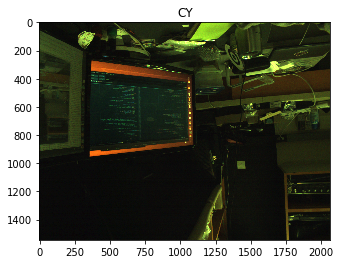

True

In [20]:
i=500
imp.reload(ana)
imc_cy = ana.ximea_get_frame(i, save_batchsize, 'cy', analysis_folders[0], img_dims=(1544,2064), normalize=True)
plt.imshow(imc_cy)
plt.title('CY')
plt.show()

cv2.imwrite('./testim_norm_cy.png', cv2.cvtColor(((imc_cy*255).astype('uint8')), cv2.COLOR_RGB2BGR))
#plt.hist(imc_cy.flatten(), bins=100);

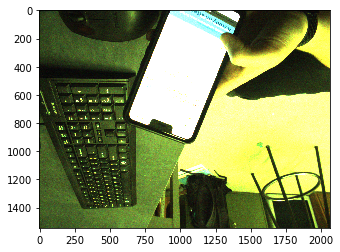

In [17]:
i=5000
frame = ana.ximea_get_frame(i, save_batchsize, 'cy', '/tb_disk/test/testing_framedrops', img_dims=(1544,2064), normalize=True)
cv2.imwrite('/home/vasha/Desktop/img.png', cv2.cvtColor(((frame*255).astype('uint8')), cv2.COLOR_RGB2BGR))
plt.imshow(frame)

## Make a Video!

In [6]:
import cv2
imp.reload(ana)

fourcc=cv2.VideoWriter_fourcc(*'mjpg')
video = cv2.VideoWriter("od_video.avi", fourcc, 100, (2064,1544), 1)

for i in range(0, 220):
    print(i,end='')
    frame = ana.ximea_get_frame(i, save_batchsize, 'od', 'test', img_dims=(1544,2064), normalize=True)
    video.write(cv2.cvtColor(np.uint8(frame*255), cv2.COLOR_BGR2RGB))
video.release()


0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219

(array([9.282538e+06, 2.778840e+05, 1.900000e+01, 1.000000e+00,
        1.000000e+00, 4.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([ 3. ,  8.8, 14.6, 20.4, 26.2, 32. , 37.8, 43.6, 49.4, 55.2, 61. ]),
 <a list of 10 Patch objects>)

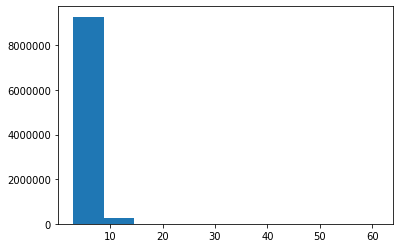

In [59]:
plt.hist(np.uint8(frame*255).flatten())

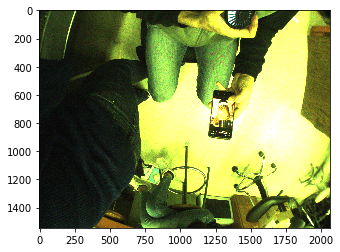

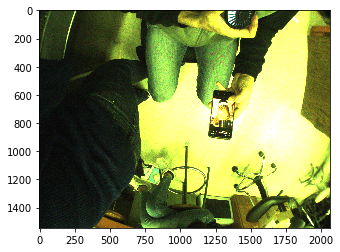

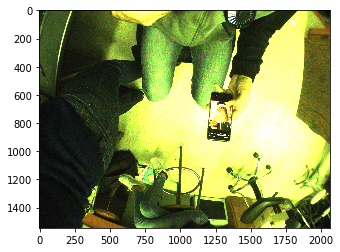

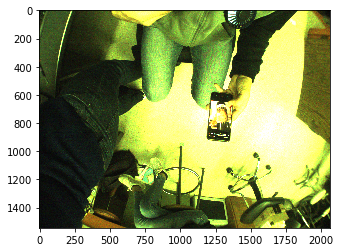

In [48]:
frame = ana.ximea_get_frame(1, save_batchsize, 'od', 'test', img_dims=(1544,2064), normalize=True)
plt.imshow(frame)
plt.show()
frame = ana.ximea_get_frame(100, save_batchsize, 'od', 'test', img_dims=(1544,2064), normalize=True)
plt.imshow(frame)
plt.show()
frame = ana.ximea_get_frame(200, save_batchsize, 'od', 'test', img_dims=(1544,2064), normalize=True)
plt.imshow(frame)
plt.show()
frame = ana.ximea_get_frame(202, save_batchsize, 'od', 'test', img_dims=(1544,2064), normalize=True)
plt.imshow(frame)
plt.show()

### Are Images all the same?

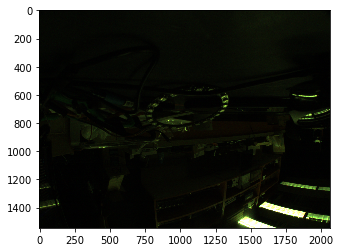

True

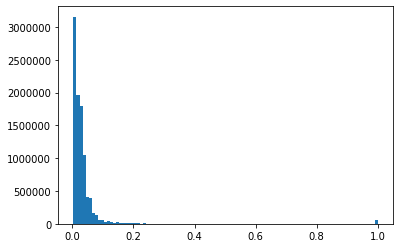

In [7]:
diff = imc_od2 - imc_od
diff = np.abs(diff/np.max(diff))
plt.imshow(diff)
plt.show()
plt.hist(diff.flatten(),bins=100)
#cv2.imwrite('./testim_norm_diff.png', cv2.cvtColor(((diff*255).astype('uint8')), cv2.COLOR_RGB2BGR))
cv2.imwrite('./testim_norm_diff.png', cv2.cvtColor(((diff*255).astype('uint8')), cv2.COLOR_RGB2BGR))


In [6]:
ana.plot_camera_timing('./test/timestamps_od.tsv', './test/timestamp_plot_od.png', 'od')
ana.plot_camera_timing('./test/timestamps_os.tsv', './test/timestamp_plot_os.png', 'os')
ana.plot_camera_timing('/tb_disk/test/timestamps_cy.tsv', './test/timestamp_plot_cy.png', 'cy')

ana.plot_camera_dframe('./test/timestamps_od.tsv', './test/dframe_plot_od.png', 'od')
ana.plot_camera_dframe('./test/timestamps_os.tsv', './test/dframe_plot_os.png', 'os')
ana.plot_camera_dframe('/tb_disk/test/timestamps_cy.tsv', './test/dframe_plot_cy.png', 'cy')


IndexError: too many indices for array